   CodigoEstacion Departamento                         NombreEstacion  \
0        26125061      Quindio  AEROPUERTO EL EDEN - - AUT [26125061]   
1        26125061      Quindio  AEROPUERTO EL EDEN - - AUT [26125061]   
2        26125061      Quindio  AEROPUERTO EL EDEN - - AUT [26125061]   
3        26125061      Quindio  AEROPUERTO EL EDEN - - AUT [26125061]   
4        26125061      Quindio  AEROPUERTO EL EDEN - - AUT [26125061]   

        Variable                    Parametro           Fecha Unidad  Valor  \
0  PRECIPITACION  Precipitación total mensual  1/01/2010 0:00     mm   11.5   
1  PRECIPITACION  Precipitación total mensual  1/02/2010 0:00     mm   19.4   
2  PRECIPITACION  Precipitación total mensual  1/03/2010 0:00     mm  122.7   
3  PRECIPITACION  Precipitación total mensual  1/04/2010 0:00     mm  391.8   
4  PRECIPITACION  Precipitación total mensual  1/05/2010 0:00     mm  250.4   

  NivelAprobacion  
0      Preliminar  
1      Preliminar  
2      Preliminar  
3     

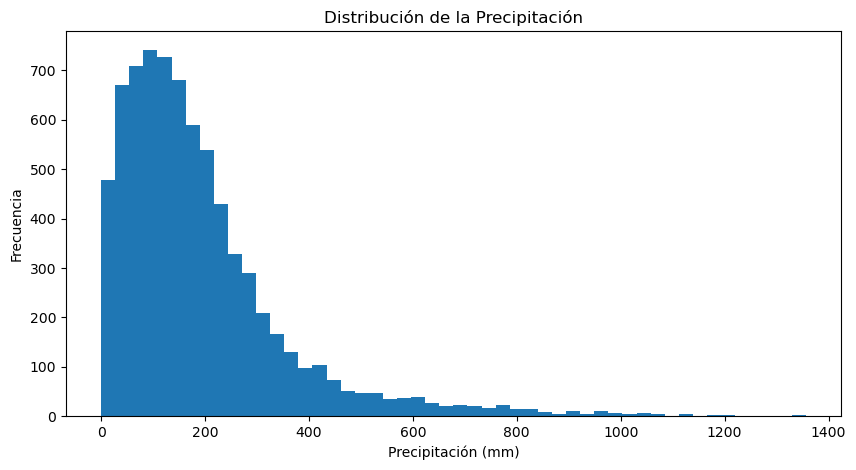

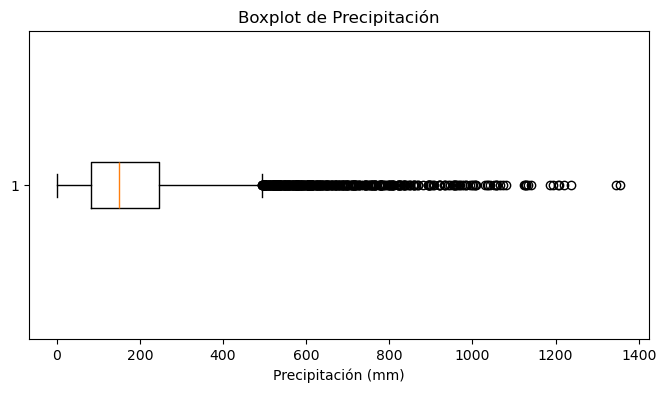

            Valor
Fecha            
2010-01-01   11.5
2010-01-01  349.7
2010-01-01  559.0
2010-01-01   35.5
2010-01-01   31.3


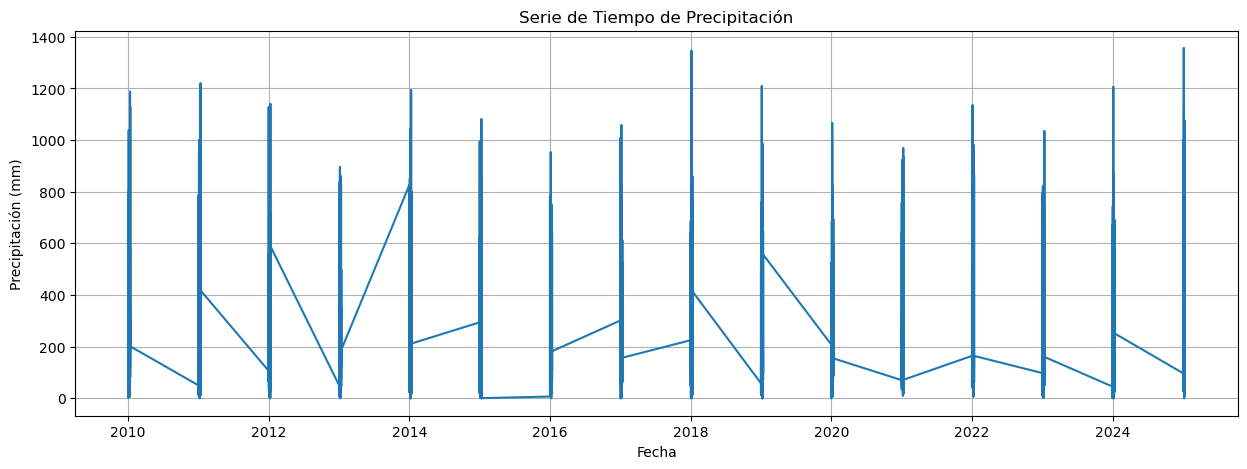

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datos_precipitacion.csv")
print(df.head())
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Convertir columnas categóricas a string
cols_string = ["Departamento", "NombreEstacion", "Variable", "Parametro", "NivelAprobacion"]
df[cols_string] = df[cols_string].astype(str)

# Convertir la fecha a datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], errors='coerce')

print(df.dtypes)

# Contar cuántos valores negativos hay en la columna Valor
cantidad_negativos = (df["Valor"] < 0).sum()

print("Cantidad de valores negativos en la columna Valor:", cantidad_negativos)

duplicados = df[df.duplicated()]
print("Duplicados encontrados:", len(duplicados))

#Etendimiento

# Estadisticas descriptivas
print("\nEstadísticas descriptivas del valor de precipitación:")
print(df["Valor"].describe())

# Dsitribucion
plt.figure(figsize=(10,5))
plt.hist(df["Valor"], bins=50)
plt.title("Distribución de la Precipitación")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(8,4))
plt.boxplot(df["Valor"], vert=False)
plt.title("Boxplot de Precipitación")
plt.xlabel("Precipitación (mm)")
plt.show()

#Serie temporal
df_ts = df[["Fecha", "Valor"]].copy()
df_ts = df_ts.sort_values("Fecha")
df_ts = df_ts.set_index("Fecha")
print(df_ts.head())
plt.figure(figsize=(15,5))
plt.plot(df_ts.index, df_ts["Valor"])
plt.title("Serie de Tiempo de Precipitación")
plt.xlabel("Fecha")
plt.ylabel("Precipitación (mm)")
plt.grid(True)
plt.show()